In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [27]:
df = pd.read_csv('museums.csv', low_memory=False)






## Exploratory Data Analysis

In this section, we are going to perform an Exploratory Data Analysis of Museums data. In this regards, we will undertake different descriptive and statistical analysis of the data. We will try to identify the missing values, when present, clean them and try to make meaning of the remaining data. 


In [28]:
# We'll look at the head in order to understand labels of the data. 
df.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [29]:
# Let's see for the general information about the data. 
#It seems, there are a lot of missing values in columns such as Institution Name column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 25 columns):
Museum ID                                   33072 non-null int64
Museum Name                                 33072 non-null object
Legal Name                                  33072 non-null object
Alternate Name                              1927 non-null object
Museum Type                                 33072 non-null object
Institution Name                            2749 non-null object
Street Address (Administrative Location)    33062 non-null object
City (Administrative Location)              33072 non-null object
State (Administrative Location)             33072 non-null object
Zip Code (Administrative Location)          33072 non-null object
Street Address (Physical Location)          9216 non-null object
City (Physical Location)                    9223 non-null object
State (Physical Location)                   9223 non-null object
Zip Code (Physical Location)           

In [30]:
#Let's see the statistical values of the numerical columns. 
#According to the data, in the first quartile the income and revenue for some museums or such institutions seems to be 0. 
#These institutions either have not provided their earnings or are completely subsidized by the government, 
#which exempts them to publish their earnings. 

df.describe()

,Museum ID,Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
count,3.307200e+04,9221.000000,33007.000000,33007.000000,32995.000000,30536.000000,33071.000000,33072.000000,23280.000000,2.296100e+04,2.229000e+04
mean,8.403812e+09,47805.644616,38.925372,-90.816757,2.505834,85.701926,29.065828,3.670083,201347.458548,1.069682e+08,2.097605e+07
std,2.662542e+06,30210.265032,5.126213,16.489087,1.211841,105.668318,15.431254,1.539274,67.670742,2.509287e+09,2.485197e+08
min,8.400100e+09,1002.000000,0.000000,-166.541260,1.000000,1.000000,1.000000,1.000000,199906.000000,-9.230000e+02,-2.127393e+06
25%,8.401801e+09,20180.000000,35.567720,-97.651155,1.000000,25.000000,17.000000,2.000000,201312.000000,0.000000e+00,0.000000e+00
50%,8.403600e+09,47448.000000,39.831640,-86.776840,2.000000,61.000000,29.000000,4.000000,201312.000000,8.781000e+03,3.307000e+03
75%,8.404801e+09,74743.000000,42.237490,-77.616930,4.000000,109.000000,42.000000,5.000000,201408.000000,2.163770e+05,1.676960e+05
max,8.409504e+09,99901.000000,70.669760,0.000000,4.000000,840.000000,90.000000,6.000000,201504.000000,8.318144e+10,5.840349e+09


In [31]:
#Let's look at the statistical values from a differnet perspective. 
df.describe(include='O').transpose()

,count,unique,top,freq
Museum Name,33072,31546,PLANETARIUM,57
Legal Name,33072,30430,PLANETARIUM,53
Alternate Name,1927,1883,REGENTS OF THE UNIVERSITY OF CALIFORNIA LOS A...,7
Museum Type,33072,9,HISTORIC PRESERVATION,14861
Institution Name,2749,1581,PENNSYLVANIA STATE UNIVERSITY,22
Street Address (Administrative Location),33062,25493,603 W JACKSON,63
City (Administrative Location),33072,8621,NEW YORK,297
State (Administrative Location),33072,51,CA,2670
Zip Code (Administrative Location),33072,15485,74743,67
Street Address (Physical Location),9216,8769,603 W JACKSON,9


In [32]:
#Let's check the check the shape of the dataframe.
df.shape

(33072, 25)



## Removing the irrelevant columns, duplicates and missing values

In this part, we are going to first remove the irrelevant columns. Depending on the data, the removal of the columns can be different. But in this case, we have identified that there are overlapping information such as institution addresses or names. This information are not going to add value to our analysis. Moreover, some of the columns have more missing values. Therefore, we decided to drop those columns. Another column that we drop is the column of the Phone Numbers.   

In [33]:
#Let's get the column names' first

df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

In [34]:
#Now, let's drop the columns.

df = df.drop(['Museum ID','Legal Name', 'Alternate Name', 'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Phone Number', 'Employer ID Number'], axis=1)

# And check the head again. 

df.head()

,Museum Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NaN,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0
1,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NaN,61.16890,-149.76708,4.0,20.0,2.0,6,201312.0,1379576.0,1323742.0
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,NaN,60.56149,-151.21598,3.0,122.0,2.0,6,201312.0,740030.0,729080.0
3,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,NaN,60.56280,-151.26597,3.0,122.0,2.0,6,201412.0,0.0,0.0
4,ALASKA HERITAGE MUSEUM,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0


In [35]:
# Let' check the shape of dataframe again. 

df.shape

(33072, 17)

In [36]:
# Let's remove the number of rows before removing the duplicates.

df = df.drop_duplicates()

,Museum Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,NaN,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0
1,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,NaN,61.16890,-149.76708,4.0,20.0,2.0,6,201312.0,1379576.0,1323742.0
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,NaN,60.56149,-151.21598,3.0,122.0,2.0,6,201312.0,740030.0,729080.0
3,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,NaN,60.56280,-151.26597,3.0,122.0,2.0,6,201412.0,0.0,0.0
4,ALASKA HERITAGE MUSEUM,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,NaN,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0


In [37]:
# Let's count the number of rows after removing the duplicates.

df.count()

Museum Name                                 33071
Museum Type                                 33071
Institution Name                             2749
Street Address (Administrative Location)    33061
City (Administrative Location)              33071
State (Administrative Location)             33071
Zip Code (Administrative Location)          33071
Zip Code (Physical Location)                 9221
Latitude                                    33006
Longitude                                   33006
Locale Code (NCES)                          32994
County Code (FIPS)                          30535
State Code (FIPS)                           33070
Region Code (AAM)                           33071
Tax Period                                  23279
Income                                      22960
Revenue                                     22289
dtype: int64

In [39]:
# The next thing is to identify the number of missing values. 
#According to our dataframe, columns such as Institution Name or 
#Zip Code (Physical Location) have the most missing values.

df.isnull().sum()

Museum Name                                     0
Museum Type                                     0
Institution Name                            30322
Street Address (Administrative Location)       10
City (Administrative Location)                  0
State (Administrative Location)                 0
Zip Code (Administrative Location)              0
Zip Code (Physical Location)                23850
Latitude                                       65
Longitude                                      65
Locale Code (NCES)                             77
County Code (FIPS)                           2536
State Code (FIPS)                               1
Region Code (AAM)                               0
Tax Period                                   9792
Income                                      10111
Revenue                                     10782
dtype: int64

In [41]:
# Let's find the columns, which have more than 50% missing values.

most_missing_cols = set(df.columns[df.isnull().mean() > 0.50])

most_missing_cols

{'Institution Name', 'Zip Code (Physical Location)'}

In [42]:
# In this case let's drop the "Institution Name" and Zip Code (Physical Location) columns, since we believe that 
#ommision of these columns will not much differnce to our analysis. 

df = df.drop(['Institution Name', 'Zip Code (Physical Location)'], axis=1)

In [43]:
# Let's check the head of our dataframe again to make sure that the last two columns have been dropped.

df.head()

,Museum Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0
1,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,61.16890,-149.76708,4.0,20.0,2.0,6,201312.0,1379576.0,1323742.0
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,9711 KENAI SPUR HWY,KENAI,AK,99611,60.56149,-151.21598,3.0,122.0,2.0,6,201312.0,740030.0,729080.0
3,ALASKA EDUCATORS HISTORICAL SOCIETY,HISTORIC PRESERVATION,214 BIRCH STREET,KENAI,AK,99611,60.56280,-151.26597,3.0,122.0,2.0,6,201412.0,0.0,0.0
4,ALASKA HERITAGE MUSEUM,HISTORY MUSEUM,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0


In [44]:
# The next step is to drop the missing values. 

df = df.dropna()
df.count()

Museum Name                                 20700
Museum Type                                 20700
Street Address (Administrative Location)    20700
City (Administrative Location)              20700
State (Administrative Location)             20700
Zip Code (Administrative Location)          20700
Latitude                                    20700
Longitude                                   20700
Locale Code (NCES)                          20700
County Code (FIPS)                          20700
State Code (FIPS)                           20700
Region Code (AAM)                           20700
Tax Period                                  20700
Income                                      20700
Revenue                                     20700
dtype: int64

In [66]:
# Let's check the columns with 0 missing values

no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'City (Administrative Location)',
 'County Code (FIPS)',
 'Income',
 'Latitude',
 'Locale Code (NCES)',
 'Longitude',
 'Museum Name',
 'Museum Type',
 'Region Code (AAM)',
 'Revenue',
 'State (Administrative Location)',
 'State Code (FIPS)',
 'Street Address (Administrative Location)',
 'Tax Period',
 'Zip Code (Administrative Location)'}

Even though Revenue column does appear in the above snippet, in the code below, we have identified rows 
that have 0s rather than missing values. We believe that these institutions with 0 Revenues are the ones  
that receive support from the government and are not required to file for taxes. 0s affect the mean of our calculations. Therefore, we will filter out the rows with 0s as well. 

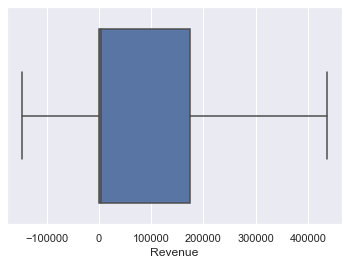

In [72]:
# When we plot the Revenue column with 0s included, the mean is close to zero and almost invisible. 
sns.boxplot(x=df['Revenue'], showfliers=False);

In [73]:
# Now, we are going to filter out the rows that have 0 values and assign the result to a new variable.
no_zeros = df[df['Revenue']!=0]

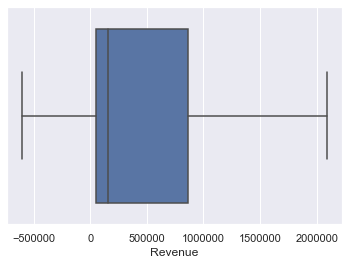

In [69]:
# Let's look at the spread of the revenue with 0s filtered out. As you can observe the mean, 
#even though slightly, has moved to the right. 
sns.boxplot(x=no_zeros['Revenue'] , showfliers=False);

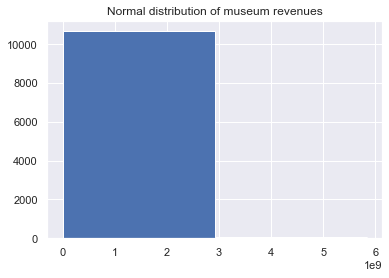

In [88]:
#In terms of normal distribution, we have a right skewed histogram. 
fig, ax = plt.subplots()
ax.hist(x=no_zeros['Revenue'], bins =2)
ax.set(title = 'Normal distribution of museum revenues');

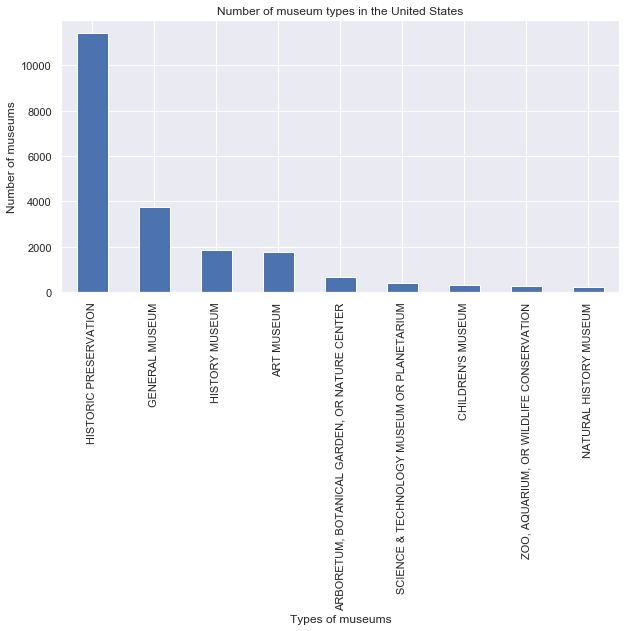

In [91]:
# Let's count the number of museum types available in the dataframe.

df['Museum Type'].value_counts().nlargest(20).plot(figsize=(10,5), kind = 'bar')
plt.title("Number of museum types in the United States")
plt.ylabel("Number of museums")
plt.xlabel("Types of museums");

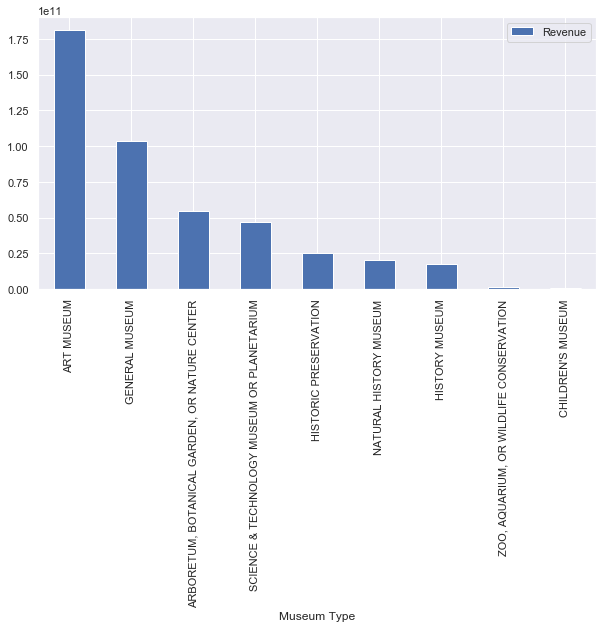

In [155]:
#Let's see what type of museums attract the most visitors in terms of revenue.

type_rev = df.groupby(['Museum Type']).agg({'Revenue':'sum'})
type_rev = type_rev.sort_values(by='Revenue', ascending=False)
type_rev.plot(kind='bar', figsize=(10,5));

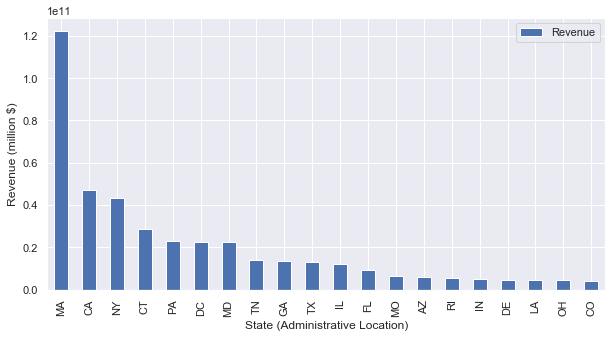

In [156]:
# How about the states that earn the majority of Revenues?
state_rev = df.groupby(['State (Administrative Location)']).agg({'Revenue':'sum'})
state_rev = state_rev.sort_values(by='Revenue', ascending=False)
state_rev[:20].plot(kind='bar', figsize=(10,5))
plt.ylabel('Revenue (million $)');

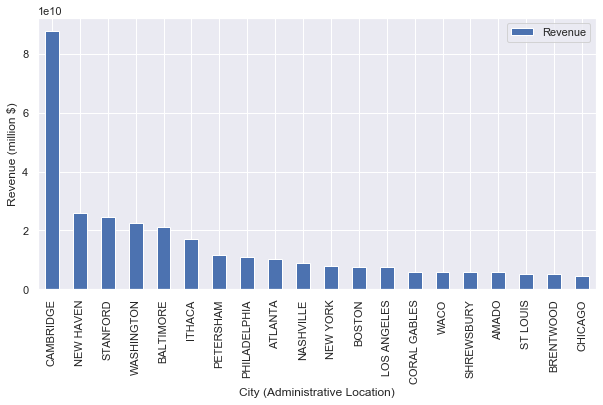

In [170]:
# Let's see the top grossing museums in terms of their city locations. 
city_rev = df.groupby(['City (Administrative Location)']).agg({'Revenue':'sum'})
city_rev = city_rev.sort_values(by='Revenue', ascending=False)
city_rev[:20].plot(kind='bar', figsize=(10,5))
plt.ylabel('Revenue (million $)');

In [175]:
# In this section we are going to create a column based on revenue 
#column in order to rank the museums in terms of their revenues. 

cols = ['Revenue']

no_zeros['Rank'] = no_zeros.sort_values(cols, ascending=False).groupby(cols, sort=False).ngroup()+1
no_zeros.head()

,Museum Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue,Rank
0,ALASKA AVIATION HERITAGE MUSEUM,HISTORY MUSEUM,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0,2676
1,ALASKA BOTANICAL GARDEN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,61.16890,-149.76708,4.0,20.0,2.0,6,201312.0,1379576.0,1323742.0,1806
2,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,9711 KENAI SPUR HWY,KENAI,AK,99611,60.56149,-151.21598,3.0,122.0,2.0,6,201312.0,740030.0,729080.0,2357
4,ALASKA HERITAGE MUSEUM,HISTORY MUSEUM,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,61.17925,-149.97254,1.0,20.0,2.0,6,201312.0,602912.0,550236.0,2676
6,ALASKA JEWISH MUSEUM,GENERAL MUSEUM,1117 E 35TH AVE,ANCHORAGE,AK,99508,61.18946,-149.86071,1.0,20.0,2.0,6,201312.0,2658938.0,34374.0,7684


In [178]:
no_zeros.sort_values('Rank')

,Museum Name,Museum Type,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue,Rank
11883,ARNOLD ARBORETUM OF HARVARD UNIVERSITY JAMAICA...,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",125 ARBORWAY,CAMBRIDGE,MA,2130,42.36977,-71.11216,1.0,17.0,25.0,1,201306.0,8.318144e+10,5.840349e+09,1
12021,CENTER FOR CONSERVATION AND TECHNICAL STUDIES,ART MUSEUM,32 QUINCY STREET,CAMBRIDGE,MA,2138,42.36977,-71.11216,1.0,17.0,25.0,1,201306.0,8.318144e+10,5.840349e+09,1
12794,WARREN ANATOMICAL MUSEUM,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,10 SHATTUCK STREET,BOSTON,MA,2115,42.36977,-71.11216,1.0,17.0,25.0,1,201306.0,8.318144e+10,5.840349e+09,1
12231,HARVARD UNIVERSITY MUSEUMS OF NATURAL HISTORY,NATURAL HISTORY MUSEUM,26 OXFORD STREET,CAMBRIDGE,MA,2138,42.36977,-71.11216,1.0,17.0,25.0,1,201306.0,8.318144e+10,5.840349e+09,1
1090,FRED LAWRENCE WHIPPLE OBSERVATORY,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,670 MT HOPKINS RD,AMADO,AZ,2138,42.36977,-71.11216,1.0,17.0,25.0,1,201306.0,8.318144e+10,5.840349e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,TEXAS AVIATION HALL OF FAME,HISTORY MUSEUM,2002 TERMINAL DR,GALVESTON,TX,77554,29.26904,-94.85453,3.0,167.0,48.0,5,201312.0,1.561679e+06,-5.676300e+05,9510
6226,MARY BROGAN MUSEUM OF ART AND SCIENCE,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,350 SOUTH DUVAL STREET,TALLAHASSEE,FL,32301,30.43901,-84.28364,1.0,73.0,12.0,3,201406.0,1.942400e+05,-5.988130e+05,9511
21282,MORRELLY HOMELAND SECURITY CENTER,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,510 GRUMMAN RD W,BETHPAGE,NY,11714,40.75900,-73.48749,2.0,59.0,36.0,2,201312.0,1.443401e+06,-1.723674e+06,9512
13509,BANGOR MUSEUM AND CENTER FOR HISTORY,GENERAL MUSEUM,159 UNION STREET,BANGOR,ME,4401,44.79975,-68.77437,1.0,19.0,23.0,1,201312.0,3.811200e+05,-1.799709e+06,9513


In [177]:
#Here we can see that the Museums, that are sorted by their revenues. When we compare with the Rank column
#we see different museum names. It's probably due to the rank method.

museum_rev = df[['Museum Name','Revenue']].sort_values(by='Revenue', ascending=False)
museum_rev.head()

,Museum Name,Revenue
12064,COLLECTION OF SCIENTIFIC INSTRUMENTS,5.840349e+09
11989,BUSCH-REISINGER MUSEUM,5.840349e+09
12230,HARVARD UNIVERSITY MUSEUM OF COMPARATIVE ZOOLOGY,5.840349e+09
12229,HARVARD UNIVERSITY MINERALOGICAL AND GEOLOGICA...,5.840349e+09
12228,HARVARD UNIVERSITY HERBARIA,5.840349e+09


## Conclusion

The aim of this analysis was to perform statistical analysis on Museums, Aquariums and Zoo data. As we have seen 
the dataset contains many null 0 zero values. In order to get an accurate result, we have dropped null values and ommited 0 values from our calculations. The dataset contained duplicate or overlapping values as well. We have identified these values and dropped before starting to analyze the data. We remaining data, we were able to analyze identify the number of revenues, high earning cities and states and plot the results on bar charts. 